In [1]:
## this includes both Figure 7 and 8 of the LVDB overview paper 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table

In [3]:
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
dsph_mw = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')
dsph_m31 = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_m31.csv')
dsph_lf = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field.csv')
dsph_lf_distant = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field_distant.csv')
gc_ufsc = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_ufsc.csv')
gc_disk = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_disk.csv')
gc_harris = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_harris.csv')


In [5]:
color_dsph_mw = 'tab:blue'
color_dsph_m31 = 'tab:orange'
color_dsph_lf = 'tab:green'
color_dsph_lf_distant = 'tab:red'

color_gc_disk = 'tab:purple'
color_gc_harris = 'tab:brown'
color_gc_ufcss = 'tab:olive'

color_gc_dwarf = 'tab:pink'
color_gc_lmc_smc = 'tab:grey'

label_dsph_mw = r'${\rm Dwarf~MW}$'
label_dsph_m31 = r'${\rm Dwarf~M31}$'
label_dsph_lf = r'${\rm Dwarf~LF}$'
label_dsph_lf_distant = r'${\rm Dwarf~LV}$'
label_gc_ufcss = r'${\rm UFCSS}$'
label_gc_harris = r'${\rm GC~Harris}$'
label_gc_disk =r'${\rm GC~New~Disk}$'


In [6]:
mp.rcParams['ytick.right'] = False ## for the Mstar left-hand axis

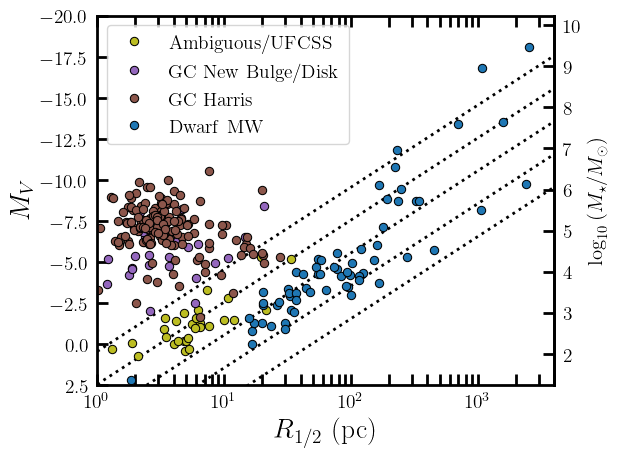

In [7]:
## size-luminosity plots for MW systems
## add lines of constant surface brightness
def const_mu(muV, rhalf):
     return muV - 36.57 - 2.5 * np.log10(2.*np.pi*rhalf**2)
x = np.arange(1, 1e4, 1)
for mu in [24, 26, 28, 30, 32]:
    plt.plot(x,  [const_mu(mu, i/1000.) for i in x], c='k', lw=2, ls=':')

## plot data
plt.errorbar(dsph_mw['rhalf_sph_physical'], dsph_mw['M_V'], fmt='o', label=r'${\rm Dwarf~MW}$', c=color_dsph_mw, mec='k', mew=0.75)

plt.plot(gc_ufsc['rhalf_sph_physical'], gc_ufsc['M_V'], 'o', c=color_gc_ufcss, mec='k', mew=0.75,label=r'${\rm Ambiguous/UFCSS}$')
plt.plot(gc_disk['rhalf_sph_physical'], gc_disk['M_V'], 'o', c=color_gc_disk, mec='k', mew=0.75,label=r'${\rm GC~New~Bulge/Disk}$')
plt.plot(gc_harris['rhalf_sph_physical'], gc_harris['M_V'], 'o', c=color_gc_harris, mec='k', mew=0.75,label=r'${\rm GC~Harris}$')

plt.gca().set_xscale('log') 
plt.gca().invert_yaxis()
plt.gca().set_xlabel(r'$R_{1/2}~({\rm pc})$')
plt.gca().set_ylabel(r'$M_V$')

plt.ylim(2.5, -20)
plt.xlim(1, 4e3)
plt.legend(loc=2)

## functions for twin y-axis
def lum(x):
    m_x_sun=4.83
    return -.4*(x - m_x_sun) + np.log10(2.)
def lum_inverse(x):
    m_x_sun=4.83
    return m_x_sun - (x )/0.4 + np.log10(2.)

secax = plt.gca().secondary_yaxis('right', functions=(lum, lum_inverse))
secax.set_ylabel(r'$\log_{10}{(M_{\star}/M_{\odot})}$', fontsize=15)

plt.tight_layout()
plt.savefig('plots/mw_rhalf_m_v_m_star.pdf')
plt.show()

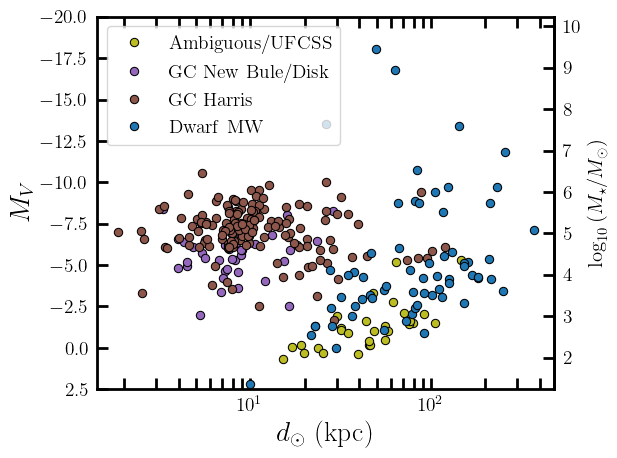

In [8]:
## distance-luminosity plot

plt.errorbar(dsph_mw['distance'], dsph_mw['M_V'], fmt='o', label=r'${\rm Dwarf~MW}$', c=color_dsph_mw, mec='k', mew=0.75)

plt.plot(gc_ufsc['distance'], gc_ufsc['M_V'], 'o', c=color_gc_ufcss, mec='k', mew=0.75,label=r'${\rm Ambiguous/UFCSS}$')
plt.plot(gc_disk['distance'], gc_disk['M_V'], 'o', c=color_gc_disk, mec='k', mew=0.75,label=r'${\rm GC~New~Bule/Disk}$')
plt.plot(gc_harris['distance'], gc_harris['M_V'], 'o', c=color_gc_harris, mec='k', mew=0.75,label=r'${\rm GC~Harris}$')
plt.gca().set_xscale('log') 
plt.gca().invert_yaxis()

plt.gca().set_xlabel(r'$d_{\odot}~({\rm kpc})$')
plt.gca().set_ylabel(r'$M_V$')

plt.ylim(2.5, -20)


plt.legend(loc=2)

def lum(x):
    m_x_sun=4.83
    return -.4*(x - m_x_sun) + np.log10(2.)


def lum_inverse(x):
    m_x_sun=4.83
    return m_x_sun - (x )/0.4 + np.log10(2.)


secax = plt.gca().secondary_yaxis('right', functions=(lum, lum_inverse))

secax.set_ylabel(r'$\log_{10}{(M_{\star}/M_{\odot})}$', fontsize=15)
plt.tight_layout()

plt.savefig('plots/mw_distance_m_v_m_star.pdf')

plt.show()

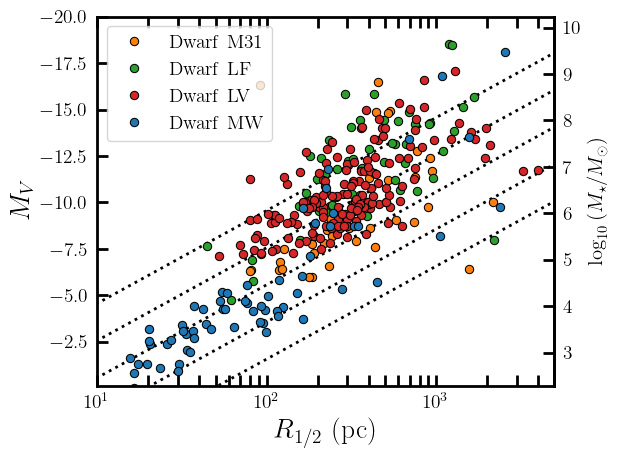

In [9]:

## size-luminosity plots
## add lines of constant surface brightness
def const_mu(muV, rhalf):
     return muV - 36.57 - 2.5 * np.log10(2.*np.pi*rhalf**2)
x = np.arange(1, 1e4, 1)
for mu in [24, 26, 28, 30, 32]:
    plt.plot(x,  [const_mu(mu, i/1000.) for i in x], c='k', lw=2, ls=':')

## plot data
plt.errorbar(dsph_mw['rhalf_sph_physical'], dsph_mw['M_V'], fmt='o', label=r'${\rm Dwarf~MW}$', c=color_dsph_mw, mec='k', mew=0.75)
plt.plot(dsph_m31['rhalf_sph_physical'], dsph_m31['M_V'], 'o', label=r'${\rm Dwarf~M31}$', c=color_dsph_m31, mec='k', mew=0.75,)
plt.plot(dsph_lf['rhalf_sph_physical'],dsph_lf['M_V'], 'o', label=label_dsph_lf, c=color_dsph_lf, mec='k', mew=0.75,)
plt.plot(dsph_lf_distant['rhalf_sph_physical'],dsph_lf_distant['M_V'], 'o', label=label_dsph_lf_distant, c=color_dsph_lf_distant, mec='k', mew=0.75,)

plt.gca().set_xscale('log')
plt.gca().invert_yaxis()
plt.gca().set_xlabel(r'$R_{1/2}~({\rm pc})$')
plt.gca().set_ylabel(r'$M_V$')

plt.ylim(-0.1, -20)
plt.xlim(10, 5e3)
plt.legend(loc=2)

## twin y-axis
def lum(x):
    m_x_sun=4.83
    return -.4*(x - m_x_sun) + np.log10(2.)
def lum_inverse(x):
    m_x_sun=4.83
    return m_x_sun - (x )/0.4 + np.log10(2.)

secax = plt.gca().secondary_yaxis('right', functions=(lum, lum_inverse))
secax.set_ylabel(r'$\log_{10}{(M_{\star}/M_{\odot})}$', fontsize=15)
plt.tight_layout()


plt.savefig('plots/dwarf_rhalf_m_v_m_star.pdf')

plt.show()